# With Preprocessing

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSE445/Dataset/After_preprocessing_Maternal-Health-Risk-Data-Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,BP
0,25,130,80,15.0,98.0,86,3.0,3.0
1,35,140,90,13.0,98.0,70,3.0,3.0
2,29,90,70,8.0,100.0,80,3.0,2.0
3,30,140,85,7.0,98.0,70,3.0,3.0
4,35,120,60,6.1,98.0,76,1.0,2.0


In [4]:
# Run commands for beautifying figures
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
X = df.drop(columns = 'RiskLevel')
y = df['RiskLevel']

In [7]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
y.value_counts()

3.0    406
1.0    406
2.0    406
Name: RiskLevel, dtype: int64

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(974, 7) (974,) (244, 7) (244,)


In [10]:
X_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BP
432,40,140,100,13.000000,101.000000,66,3.000000
277,60,120,85,15.000000,98.000000,60,2.000000
721,28,85,60,9.000000,101.000000,86,1.000000
1062,25,120,90,6.700000,101.000000,80,3.000000
678,23,140,80,7.010000,98.000000,70,3.000000
...,...,...,...,...,...,...,...
1044,31,120,60,6.100000,98.000000,76,2.000000
1095,58,120,86,15.785215,98.000000,60,2.000000
1130,20,90,61,7.541796,102.208978,61,1.208978
860,17,90,63,6.900000,101.000000,70,2.000000


In [11]:
y_train

432     3.0
277     3.0
721     2.0
1062    2.0
678     3.0
       ... 
1044    2.0
1095    3.0
1130    3.0
860     2.0
1126    3.0
Name: RiskLevel, Length: 974, dtype: float64

In [12]:
X_train.columns.values

array(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'BP'], dtype=object)

In [13]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training set and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler transformation to the test set
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the scaled datasets
print(X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape)

(974, 7) (974,) (244, 7) (244,)


In [14]:
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(criterion="gini")
dt.fit(X_train_scaled, y_train)
print('Accuracy ', accuracy_score(y_test, dt.predict(X_test_scaled)).round(3))

Accuracy  0.865


In [108]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,random_state=0)
### fit the randomized model
rf_randomcv.fit(X_train_scaled,y_train)
print('Accuracy ', accuracy_score(y_test, rf.predict(X_test_scaled)).round(3))

TypeError: ignored

In [15]:
import warnings
warnings.filterwarnings('ignore')

# Randomized Search CV [Decision Tree]

In [34]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [35]:
dt_r = DecisionTreeClassifier()
dt_randomcv = RandomizedSearchCV(estimator=dt_r, param_distributions=random_grid, n_iter=100,
                                   cv=3, random_state=42, n_jobs=-1)
### fit the randomized model
dt_randomcv.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=42)

In [36]:
dt_randomcv.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 340,
 'criterion': 'gini'}

In [37]:
dt_randomcv

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=42)

In [38]:
dt_randomcv.best_estimator_

DecisionTreeClassifier(max_depth=340, max_features='log2')

In [39]:
best_random_grid=dt_randomcv.best_estimator_

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
best_random_grid.fit(X_train_scaled, y_train)
y_pred=best_random_grid.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[71 16  0]
 [ 9 72  0]
 [ 1  2 73]]
Accuracy Score 0.8852459016393442
Classification report:               precision    recall  f1-score   support

         1.0       0.88      0.82      0.85        87
         2.0       0.80      0.89      0.84        81
         3.0       1.00      0.96      0.98        76

    accuracy                           0.89       244
   macro avg       0.89      0.89      0.89       244
weighted avg       0.89      0.89      0.89       244



# Randomized Search CV Random Forest


In [75]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [76]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=3,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=3)

In [77]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 890,
 'criterion': 'gini'}

In [78]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=3)

In [79]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=890, max_features='log2', n_estimators=1600)

In [80]:
best_random_grid=rf_randomcv.best_estimator_

In [81]:
from sklearn.metrics import accuracy_score
best_random_grid.fit(X_train_scaled, y_train)
y_pred=best_random_grid.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[69 18  0]
 [11 69  1]
 [ 1  1 74]]
Accuracy Score 0.8688524590163934
Classification report:               precision    recall  f1-score   support

         1.0       0.85      0.79      0.82        87
         2.0       0.78      0.85      0.82        81
         3.0       0.99      0.97      0.98        76

    accuracy                           0.87       244
   macro avg       0.87      0.87      0.87       244
weighted avg       0.87      0.87      0.87       244



#Ramdom Search CV [SVM]

In [82]:
from sklearn.svm import SVC

# Create the parameter grid
param_grid = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM classifier
clf = SVC()

# Perform Randomized Search Cross Validation
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=100,
                                   cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Fit the random search to your data
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:")
print(best_params)
print("Best Score:")
print(best_score)

Best Parameters:
{'kernel': 'rbf', 'gamma': 'auto', 'C': 1000.0}
Best Score:
0.7823420565688607


In [83]:
y_pred = random_search.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {}".format(accuracy))

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[68 18  1]
 [20 61  0]
 [ 2  3 71]]
Accuracy Score: 0.819672131147541
Classification Report:
              precision    recall  f1-score   support

         1.0       0.76      0.78      0.77        87
         2.0       0.74      0.75      0.75        81
         3.0       0.99      0.93      0.96        76

    accuracy                           0.82       244
   macro avg       0.83      0.82      0.83       244
weighted avg       0.82      0.82      0.82       244



# GridSearchCV [Decision Tree]

In [84]:
dt_randomcv.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 340,
 'criterion': 'gini'}

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [dt_randomcv.best_params_['criterion']],
    'max_depth': [dt_randomcv.best_params_['max_depth']],
    'max_features': [dt_randomcv.best_params_['max_features']],
    'min_samples_leaf': [dt_randomcv.best_params_['min_samples_leaf'],
                         dt_randomcv.best_params_['min_samples_leaf']+2,
                         dt_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [dt_randomcv.best_params_['min_samples_split'] - 2,
                          dt_randomcv.best_params_['min_samples_split'] - 1,
                          dt_randomcv.best_params_['min_samples_split'],
                          dt_randomcv.best_params_['min_samples_split'] +1,
                          dt_randomcv.best_params_['min_samples_split'] + 2],
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [340], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4]}


In [86]:
#### Fit the grid_search to the data
dt_g= DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt_g,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [340],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=2)

In [87]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=340, max_features='log2')

In [88]:
best_grid=grid_search.best_estimator_

In [89]:
best_grid

DecisionTreeClassifier(max_depth=340, max_features='log2')

In [91]:
best_grid.fit(X_train_scaled, y_train)
y_pred=best_grid.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[67 20  0]
 [11 69  1]
 [ 1  4 71]]
Accuracy Score 0.8483606557377049
Classification report:               precision    recall  f1-score   support

         1.0       0.85      0.77      0.81        87
         2.0       0.74      0.85      0.79        81
         3.0       0.99      0.93      0.96        76

    accuracy                           0.85       244
   macro avg       0.86      0.85      0.85       244
weighted avg       0.86      0.85      0.85       244



# Grid Search CV [ Random Forest ]

In [92]:
rf_randomcv.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 890,
 'criterion': 'gini'}

In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [890], 'max_features': ['log2'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [1400, 1500, 1600, 1700, 1800]}


In [94]:
#### Fit the grid_search to the data
rf_g=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf_g,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [890],
                         'max_features': ['log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [1400, 1500, 1600, 1700, 1800]},
             verbose=2)

In [95]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=890, max_features='log2', n_estimators=1400)

In [96]:
best_grid=grid_search.best_estimator_

In [97]:
best_grid

RandomForestClassifier(max_depth=890, max_features='log2', n_estimators=1400)

In [99]:
best_grid.fit(X_train_scaled, y_train)
y_pred=best_grid.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[70 17  0]
 [11 69  1]
 [ 1  1 74]]
Accuracy Score 0.8729508196721312
Classification report:               precision    recall  f1-score   support

         1.0       0.85      0.80      0.83        87
         2.0       0.79      0.85      0.82        81
         3.0       0.99      0.97      0.98        76

    accuracy                           0.87       244
   macro avg       0.88      0.88      0.88       244
weighted avg       0.87      0.87      0.87       244



# Grid Search CV [ SVM ]

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [random_search.best_params_['C']],
    'kernel': [random_search.best_params_['kernel']],
    'gamma': [random_search.best_params_['gamma']]
}

print(param_grid)

svm_g = SVC()
grid_search = GridSearchCV(estimator=svm_g, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
best_grid = grid_search.best_estimator_
best_grid.fit(X_train_scaled, y_train)
y_pred = best_grid.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Accuracy Score: {}".format(accuracy))
print("Classification report:\n{}".format(report))


{'C': [1000.0], 'kernel': ['rbf'], 'gamma': ['auto']}
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Confusion Matrix:
[[68 18  1]
 [20 61  0]
 [ 2  3 71]]
Accuracy Score: 0.819672131147541
Classification report:
              precision    recall  f1-score   support

         1.0       0.76      0.78      0.77        87
         2.0       0.74      0.75      0.75        81
         3.0       0.99      0.93      0.96        76

    accuracy                           0.82       244
   macro avg       0.83      0.82      0.83       244
weighted avg       0.82      0.82      0.82       244



# Auto Hyperparameter tuning

In [ ]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from sklearn.model_selection import cross_val_score

In [ ]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
         'max_depth': hp.quniform('max_depth', 10, 1200, 10),
         'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
         'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
         'min_samples_split': hp.uniform('min_samples_split', 0, 1)
         }

In [ ]:
space

{'criterion': <hyperopt.pyll.base.Apply at 0x7fe7d16056f0>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7fe7d1605ff0>,
 'max_features': <hyperopt.pyll.base.Apply at 0x7fe7d1606320>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7fe7d1606710>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x7fe7d16065f0>}

In [ ]:
def objective(space):
    # Create a DecisionTreeClassifier with the given parameters
    model = DecisionTreeClassifier(criterion=space['criterion'], max_depth=int(space['max_depth']),
                                   max_features=space['max_features'],
                                   min_samples_leaf=space['min_samples_leaf'],
                                   min_samples_split=space['min_samples_split'])

    # Perform cross-validation
    accuracy = cross_val_score(model, X_train_scaled, y_train, cv=5).mean()

    # Calculate the mean accuracy
    mean_accuracy = accuracy.mean()

    return {'loss': 1 - mean_accuracy, 'status': STATUS_OK}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=80,
            trials=trials)
print(best)

100%|██████████| 80/80 [00:07<00:00, 11.10trial/s, best loss: 0.2340734866508063]
{'criterion': 1, 'max_depth': 880.0, 'max_features': 3, 'min_samples_leaf': 6.718070149364205e-05, 'min_samples_split': 0.02786944305173875}


In [ ]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}



print(crit[best['criterion']])
print(feat[best['max_features']])


gini
None


In [ ]:
best['min_samples_leaf']

6.718070149364205e-05

In [ ]:
trainedTree = DecisionTreeClassifier(criterion=crit[best['criterion']],
                                     max_depth=int(best['max_depth']),
                                     max_features=feat[best['max_features']],
                                     min_samples_leaf=best['min_samples_leaf'],
                                     min_samples_split=best['min_samples_split']).fit(X_train_scaled, y_train)
predictionTree = trainedTree.predict(X_test_scaled)
print(confusion_matrix(y_test, predictionTree))
print(accuracy_score(y_test, predictionTree))
print(classification_report(y_test, predictionTree))
acc5 = accuracy_score(y_test, predictionTree)


[[69 18  0]
 [22 59  0]
 [ 2 16 58]]
0.7622950819672131
              precision    recall  f1-score   support

         1.0       0.74      0.79      0.77        87
         2.0       0.63      0.73      0.68        81
         3.0       1.00      0.76      0.87        76

    accuracy                           0.76       244
   macro avg       0.79      0.76      0.77       244
weighted avg       0.79      0.76      0.77       244



# Genetic Algorithm

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
!pip install tpot --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tpot import TPOTClassifier
from sklearn.tree import DecisionTreeClassifier

config_dict = {
    'sklearn.tree.DecisionTreeClassifier': {
        'criterion': ['gini', 'entropy'],
        'max_depth': range(1, 11),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21)
    }
}

tpot_classifier = TPOTClassifier(config_dict=config_dict, generations=5, population_size=24, offspring_size=12, verbosity=2, early_stop=12, cv=4, scoring='accuracy')
tpot_classifier.fit(X_train_scaled, y_train)


Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.747423767118667

Generation 2 - Current best internal CV score: 0.7484441408621737

Generation 3 - Current best internal CV score: 0.7484441408621737

Generation 4 - Current best internal CV score: 0.7577202658031438

Generation 5 - Current best internal CV score: 0.7597272819267354

Best pipeline: DecisionTreeClassifier(DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=8, min_samples_leaf=11, min_samples_split=5), criterion=entropy, max_depth=8, min_samples_leaf=2, min_samples_split=14)


TPOTClassifier(config_dict={'sklearn.tree.DecisionTreeClassifier': {'criterion': ['gini',
                                                                                  'entropy'],
                                                                    'max_depth': range(1, 11),
                                                                    'min_samples_leaf': range(1, 21),
                                                                    'min_samples_split': range(2, 21)}},
               cv=4, early_stop=12, generations=5, offspring_size=12,
               population_size=24, scoring='accuracy', verbosity=2)

In [ ]:
accuracy = tpot_classifier.score(X_test_scaled, y_test)
print(accuracy)

0.7581967213114754


# Optimize hyperparameters of the model using Optuna

In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import optuna
import sklearn.svm
from sklearn.tree import DecisionTreeClassifier

def objective(trial):
    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC', 'DecisionTree'])

    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 200, 2000, 10)
        max_depth = int(trial.suggest_float('max_depth', 10, 100, log=True))

        clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    elif classifier == 'SVC':
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)

        clf = sklearn.svm.SVC(C=c, gamma='auto')
    else:
        max_depth = int(trial.suggest_float('dt_max_depth', 10, 100, log=True))
        min_samples_split = trial.suggest_int('dt_min_samples_split', 2, 20)

        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)

    return sklearn.model_selection.cross_val_score(clf, X_train_scaled, y_train, n_jobs=-1, cv=3).mean()

# Perform hyperparameter optimization with Optuna and TPOT
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Retrieve the best hyperparameters found
best_params = study.best_params
trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2023-06-13 10:08:39,607] A new study created in memory with name: no-name-16c6e145-a224-4340-979c-5c090e254443
[I 2023-06-13 10:08:40,844] Trial 0 finished with value: 0.8131528964862298 and parameters: {'classifier': 'RandomForest', 'n_estimators': 280, 'max_depth': 27.380009000053775}. Best is trial 0 with value: 0.8131528964862298.
[I 2023-06-13 10:08:40,859] Trial 1 finished with value: 0.7700094966761633 and parameters: {'classifier': 'DecisionTree', 'dt_max_depth': 15.566807728171296, 'dt_min_samples_split': 7}. Best is trial 0 with value: 0.8131528964862298.
[I 2023-06-13 10:08:50,703] Trial 2 finished with value: 0.8213611902500791 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1570, 'max_depth': 68.38259368806224}. Best is trial 2 with value: 0.8213611902500791.
[I 2023-06-13 10:08:51,068] Trial 3 finished with value: 0.7648907882241215 and parameters: {'classifier': 'SVC', 'svc_c': 2071.069349039809}. Best is trial 2 with value: 0.8213611902500791.
[I 2023-

Accuracy: 0.8244476100031656
Best hyperparameters: {'classifier': 'RandomForest', 'n_estimators': 1490, 'max_depth': 71.99542594378323}


In [ ]:
trial

FrozenTrial(number=54, state=TrialState.COMPLETE, values=[0.8244476100031656], datetime_start=datetime.datetime(2023, 6, 13, 10, 12, 13, 22916), datetime_complete=datetime.datetime(2023, 6, 13, 10, 12, 18, 433641), params={'classifier': 'RandomForest', 'n_estimators': 1490, 'max_depth': 71.99542594378323}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('RandomForest', 'SVC', 'DecisionTree')), 'n_estimators': IntDistribution(high=2000, log=False, low=200, step=10), 'max_depth': FloatDistribution(high=100.0, log=True, low=10.0, step=None)}, trial_id=54, value=None)

In [ ]:
study.best_params

{'classifier': 'RandomForest',
 'n_estimators': 1490,
 'max_depth': 71.99542594378323}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1490,max_depth=int(71.99542594378323))
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=71, n_estimators=1490)

In [ ]:
y_pred=rf.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[70 17  0]
 [10 70  1]
 [ 1  1 74]]
0.8770491803278688
              precision    recall  f1-score   support

         1.0       0.86      0.80      0.83        87
         2.0       0.80      0.86      0.83        81
         3.0       0.99      0.97      0.98        76

    accuracy                           0.88       244
   macro avg       0.88      0.88      0.88       244
weighted avg       0.88      0.88      0.88       244



In [ ]:
y_pred = rf.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.86      0.80      0.83        87
         2.0       0.80      0.86      0.83        81
         3.0       0.99      0.97      0.98        76

    accuracy                           0.88       244
   macro avg       0.88      0.88      0.88       244
weighted avg       0.88      0.88      0.88       244



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

<Axes: >

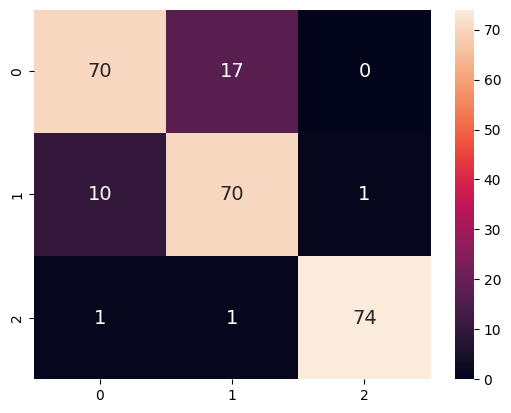

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)